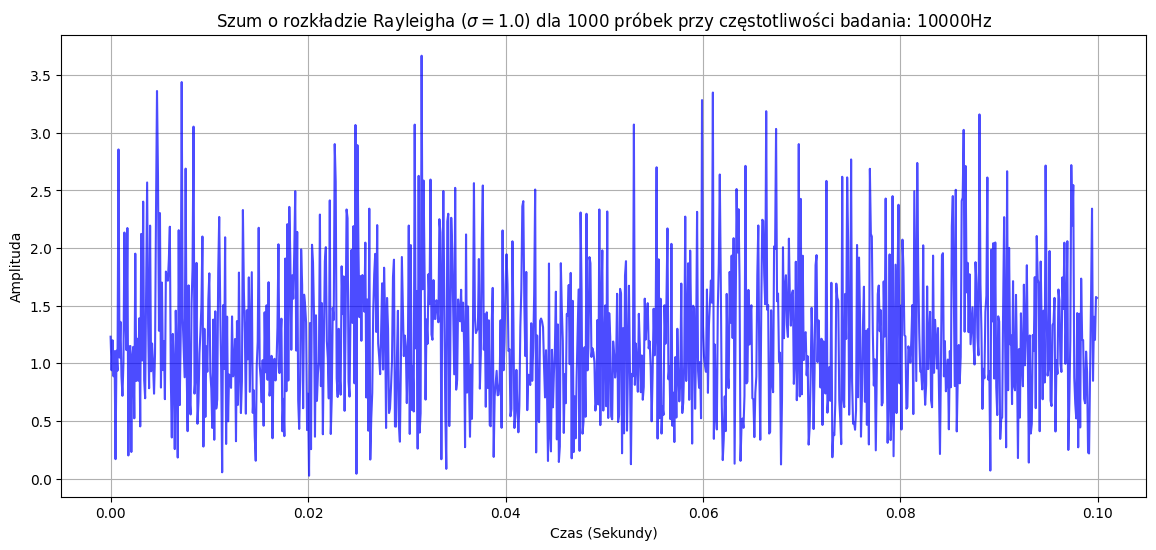

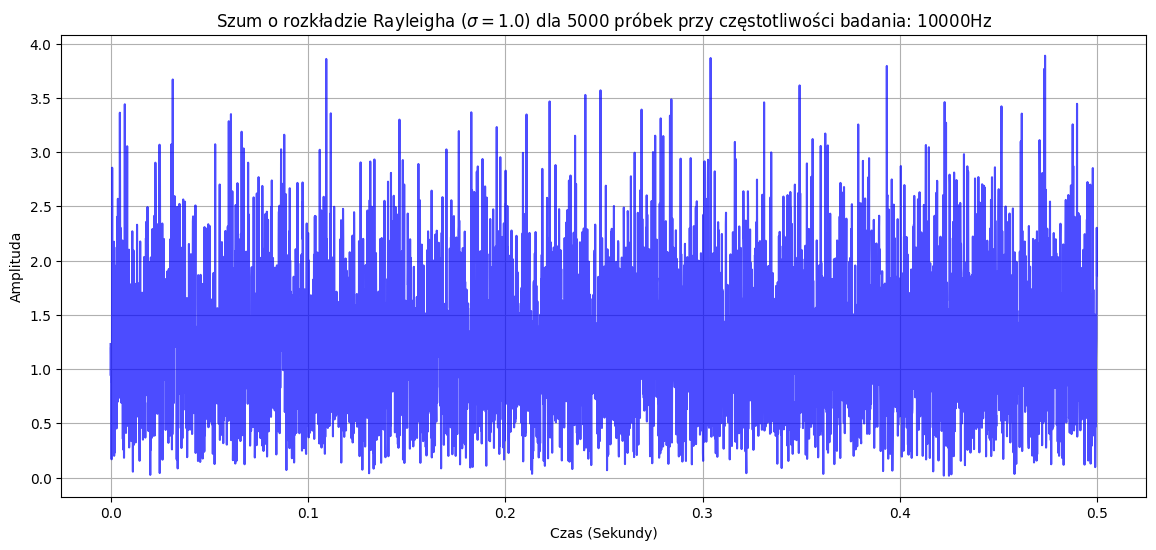

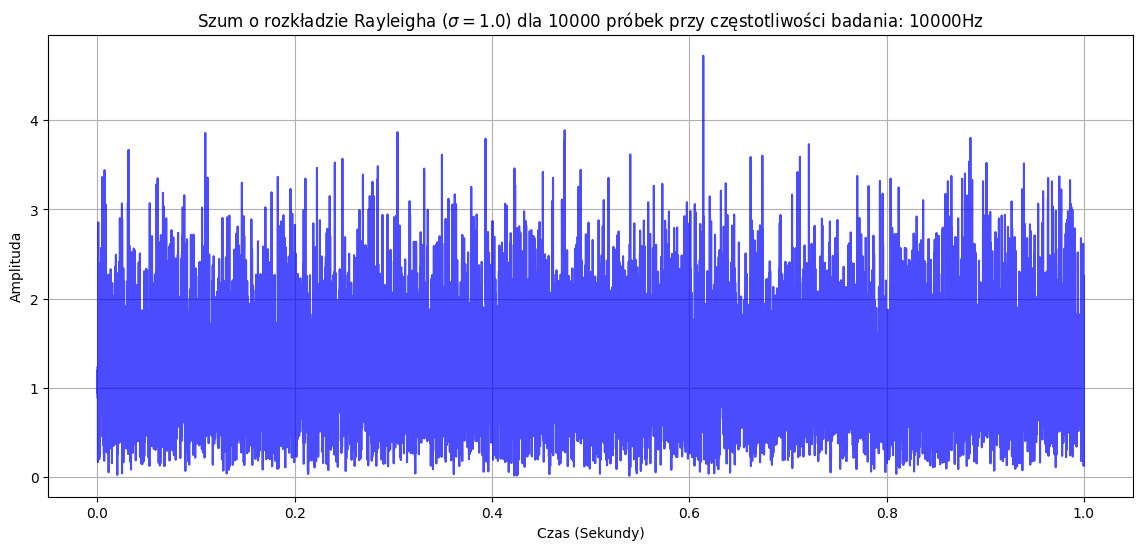

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(69420)

# Parametry symulacji
sigma = 1.0             # Parametr sigma rozkładu Rayleigha
sampling_freq = 10000  # Częstotliwość próbkowania w Hz
# 10, 100, 500, 20000
sample_sizes = [1000, 5000, 10000] # Liczba różnych próbek

num_samples = max(sample_sizes) # Liczba wszystkich próbek
duration = num_samples/sampling_freq

# Generowanie szumu Rayleigha
rayleigh_noise = np.random.rayleigh(scale=sigma, size=num_samples)

# Wizualizacja szumu
for samples in sample_sizes:
    x_time = np.array([x/num_samples * duration for x in range(samples)])
    plt.figure(figsize=(14, 6))
    plt.plot(x_time, rayleigh_noise[:samples], color="blue", alpha=0.7)
    plt.title(f"Szum o rozkładzie Rayleigha ($\\sigma=1.0$) dla {samples} próbek przy częstotliwości badania: {sampling_freq}Hz")
    plt.xlabel("Czas (Sekundy)", )
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.show()

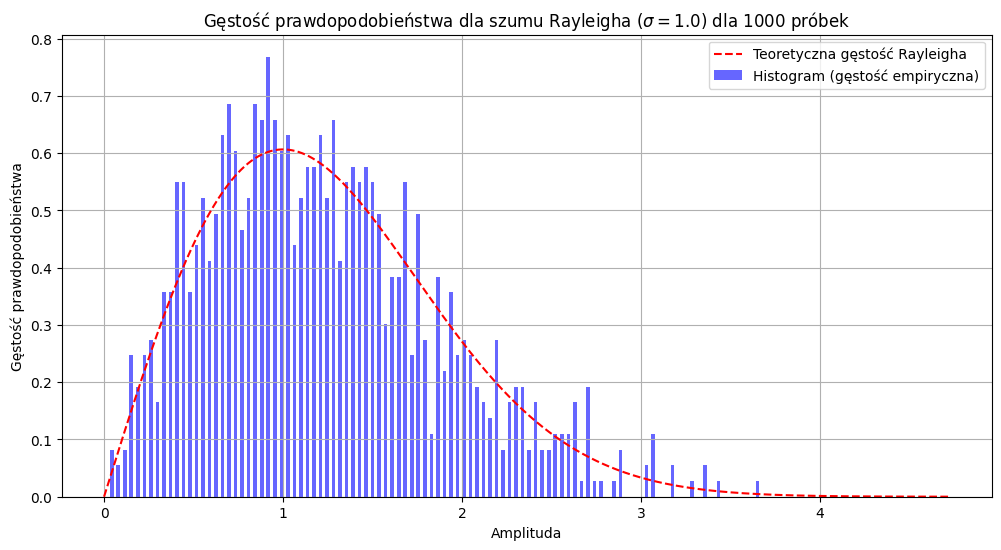

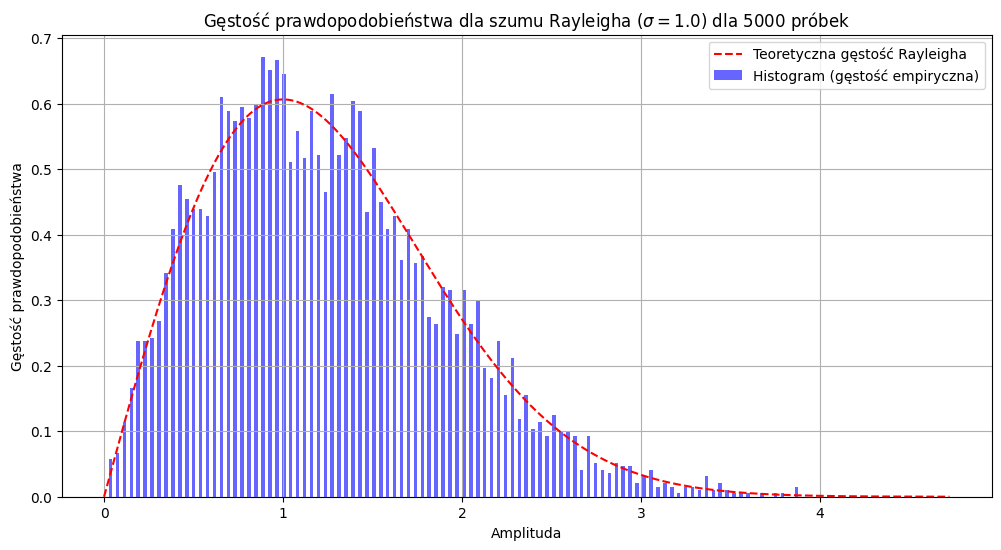

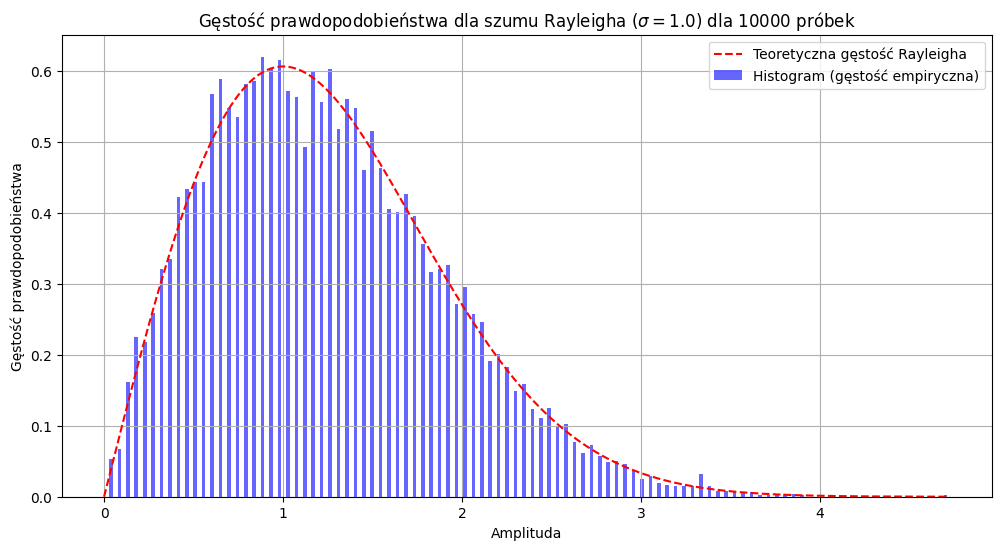

In [2]:
import scipy.stats as stats

# Obliczanie gęstości prawdopodobieństwa (PDF) dla wygenerowanego szumu Rayleigha
pdf_values = []
bins = []
bin_centers = []

x = []
rayleigh_pdf = []

for i in range(len(sample_sizes)):
    pdf_values_d, bins_d = np.histogram(rayleigh_noise[:sample_sizes[i]], bins=100, density=True)
    bin_centers_d = (bins_d[:-1] + bins_d[1:]) / 2  # Środkowe wartości przedziałów
    pdf_values.append(pdf_values_d)
    bins.append(bins_d)
    bin_centers.append(bin_centers_d)

    # Wzorcowa funkcja gęstości prawdopodobieństwa rozkładu Rayleigha dla porównania
    x.append(np.linspace(0, max(rayleigh_noise), sample_sizes[i]))
    rayleigh_pdf.append(stats.rayleigh.pdf(x[i], scale=sigma))

    # Rysowanie histogramu i PDF
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers[i], pdf_values[i], label="Histogram (gęstość empiryczna)", color="blue", width=0.02, alpha=0.6, )
    plt.plot(x[i], rayleigh_pdf[i], label="Teoretyczna gęstość Rayleigha", color="red", linestyle="--")
    plt.title(f"Gęstość prawdopodobieństwa dla szumu Rayleigha ($\\sigma=1.0$) dla {sample_sizes[i]} próbek")
    plt.xlabel("Amplituda")
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.legend()
    plt.grid(True)
    plt.show()

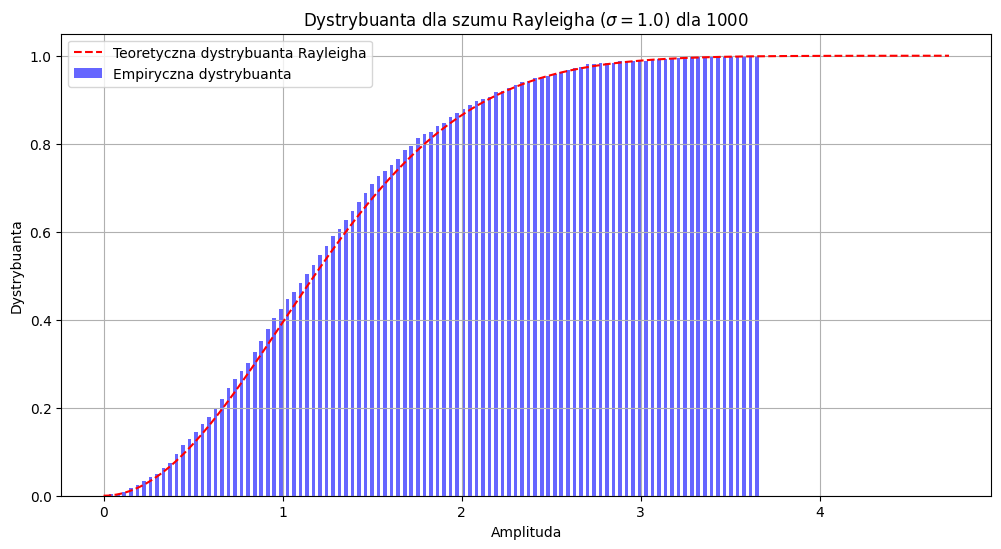

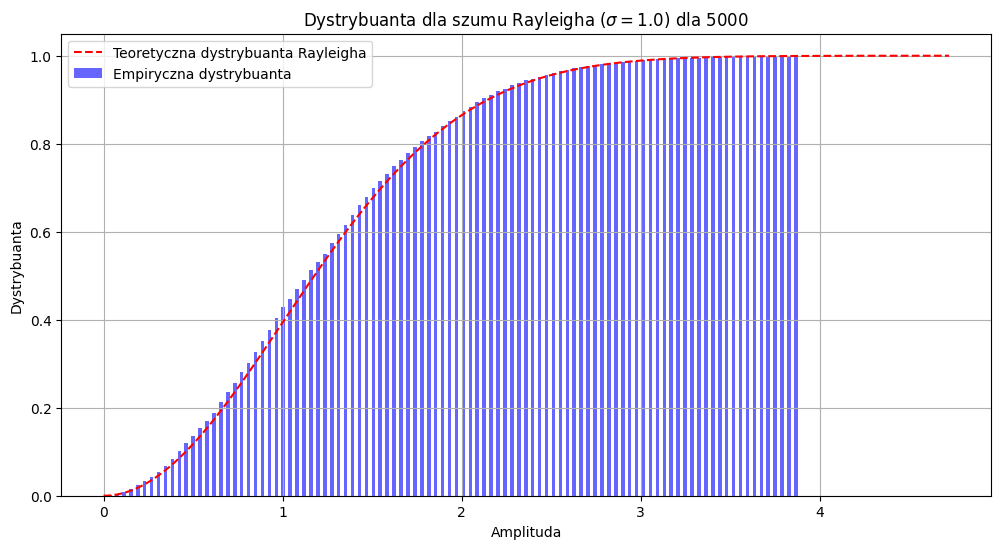

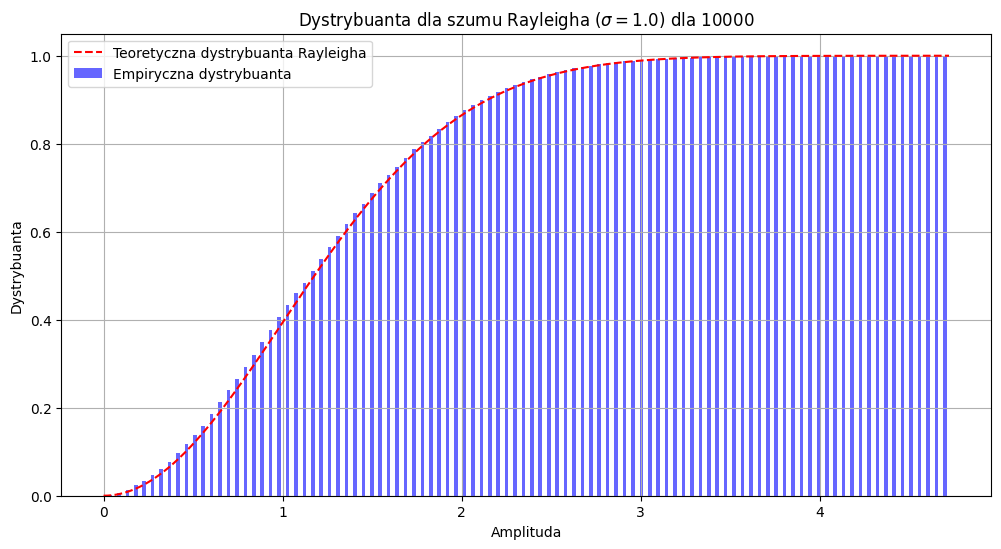

In [3]:
# Obliczanie dystrybuanty (CDF) dla rozkładu Rayleigha na podstawie wygenerowanego szumu
rayleigh_cdf_empirical = []

for i in range(len(sample_sizes)):
    rayleigh_cdf_empirical.append(np.cumsum(pdf_values[i] * np.diff(bins[i])))  # Numeryczna aproksymacja CDF z histogramu

    # Teoretyczna dystrybuanta rozkładu Rayleigha
    rayleigh_cdf_theoretical = stats.rayleigh.cdf(x[i], scale=sigma)

    # Rysowanie dystrybuanty
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers[i], rayleigh_cdf_empirical[i], label="Empiryczna dystrybuanta", color="blue", width=0.02, alpha=0.6)
    plt.plot(x[i], rayleigh_cdf_theoretical, label="Teoretyczna dystrybuanta Rayleigha", color="red", linestyle="--")
    plt.title(f"Dystrybuanta dla szumu Rayleigha ($\\sigma=1.0$) dla {sample_sizes[i]}")
    plt.xlabel("Amplituda")
    plt.ylabel("Dystrybuanta")
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
statistic_tables = []
summary_table = pd.DataFrame(sample_sizes, columns=["Sample Size"])
rayleigh_noise_means = []
rayleigh_noise_wariants = []
rayleigh_noise_st_dev = []
for i in range(len(sample_sizes)):
    table = pd.DataFrame(rayleigh_noise[:sample_sizes[i]], columns = ['x'])

    rayleigh_noise_means.append(rayleigh_noise[:sample_sizes[i]].mean())

    table['x - xsr'] = table['x'] - rayleigh_noise_means[i]
    table['(x - xsr)^2'] = table['x - xsr']**2

    rayleigh_noise_wariants.append((table['(x - xsr)^2'].sum())/(len(rayleigh_noise[:sample_sizes[i]])-1))
    rayleigh_noise_st_dev.append(rayleigh_noise_wariants[i]**(1/2))

    statistic_tables.append(table)

summary_table['Mean/Expected Value'] = rayleigh_noise_means
summary_table['Wariant'] = rayleigh_noise_wariants
summary_table['Standard Distribution'] = rayleigh_noise_st_dev
summary_table
#


,Sample Size,Mean/Expected Value,Wariant,Standard Distribution
0,1000,1.224375,0.425301,0.652151
1,5000,1.236764,0.430649,0.656238
2,10000,1.244796,0.433730,0.658582


In [11]:
# kowariancja
P_sums = []
for table in statistic_tables:
    print("Table")
    samples = len(table)
    j_sums = []
    for j in range (100):
        samples_n_cov = samples - j
        table[f"j{j}"] = 0.0
        
        for i, row in table.iterrows():
            if i >= samples_n_cov:
                break
            table.loc[i, f"j{j}"] = table["x - xsr"][i] * table["x - xsr"][i+j]
            #table[f"j{j}"][i] = table["x - xsr"][i]
            #print(row[f"j{j}"])
        j_sums.append(table[f"j{j}"].sum() / samples_n_cov)
    P_sums.append(j_sums)

statistic_tables[0]


Table
Table
Table


,x,x - xsr,(x - xsr)^2,j0,j1,j2,j3,j4,j5,j6,...,j91,j92,j93,j94,j95,j96,j97,j98,j99,PDF
0,1.230731,0.006356,0.000040,0.000040,-0.001811,-0.000156,-0.002144,-0.000755,-0.006712,-0.000728,...,0.000284,0.001770,0.005565,-0.006019,0.000478,-0.004383,-0.000493,-0.001892,0.002094,0.207395
1,0.939408,-0.284967,0.081206,0.081206,0.007010,0.096105,0.033865,0.300928,0.032634,0.082060,...,-0.079344,-0.249511,0.269854,-0.021418,0.196517,0.022085,0.084801,-0.093874,-0.158484,0.332874
2,1.199775,-0.024600,0.000605,0.000605,0.008296,0.002923,0.025978,0.002817,0.007084,-0.040122,...,-0.021539,0.023295,-0.001849,0.016964,0.001907,0.007320,-0.008104,-0.013681,0.007501,0.220877
3,0.887124,-0.337251,0.113738,0.113738,0.040078,0.356141,0.038621,0.097116,-0.550055,0.058868,...,0.319365,-0.025347,0.232573,0.026138,0.100360,-0.111097,-0.187561,0.102831,0.149883,0.351697
4,1.105537,-0.118838,0.014122,0.014122,0.125494,0.013609,0.034221,-0.193824,0.020744,-0.016092,...,-0.008932,0.081952,0.009210,0.035364,-0.039148,-0.066091,0.036235,0.052814,0.093324,0.262751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.848068,-0.376306,0.141607,0.141607,-0.067447,0.007908,-0.132124,-0.128989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364097
996,1.403610,0.179235,0.032125,0.032125,-0.003767,0.062931,0.061437,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138470
997,1.203360,-0.021015,0.000442,0.000442,-0.007378,-0.007203,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219304
998,1.575482,0.351107,0.123276,0.123276,0.120351,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085133


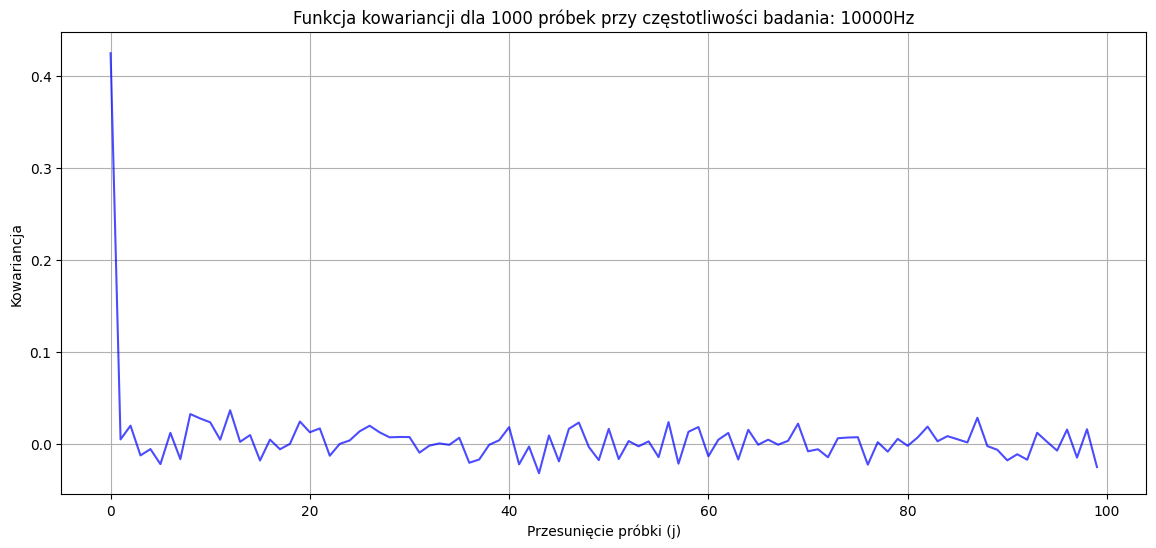

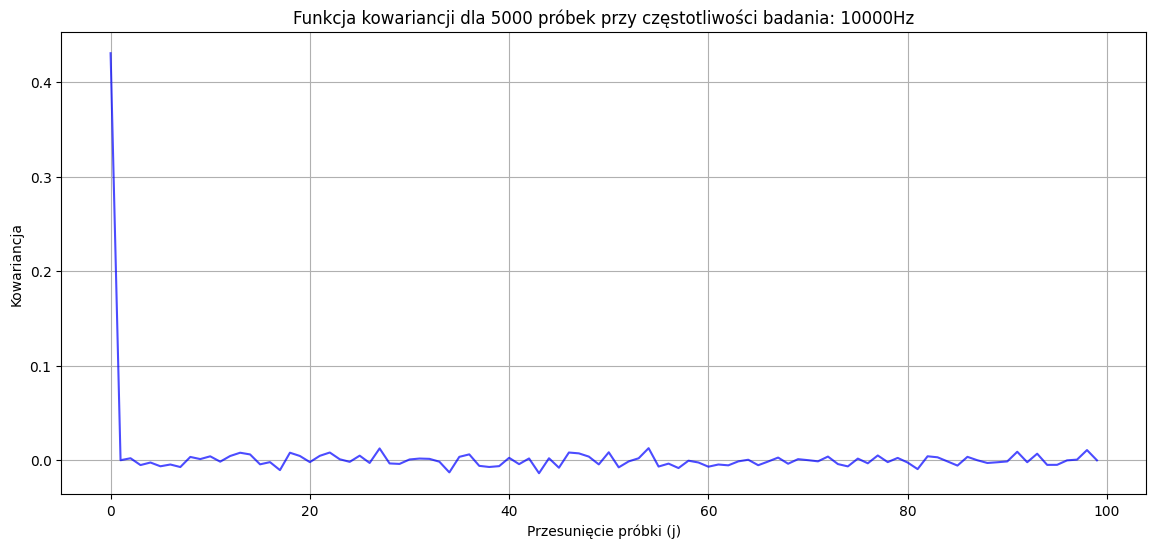

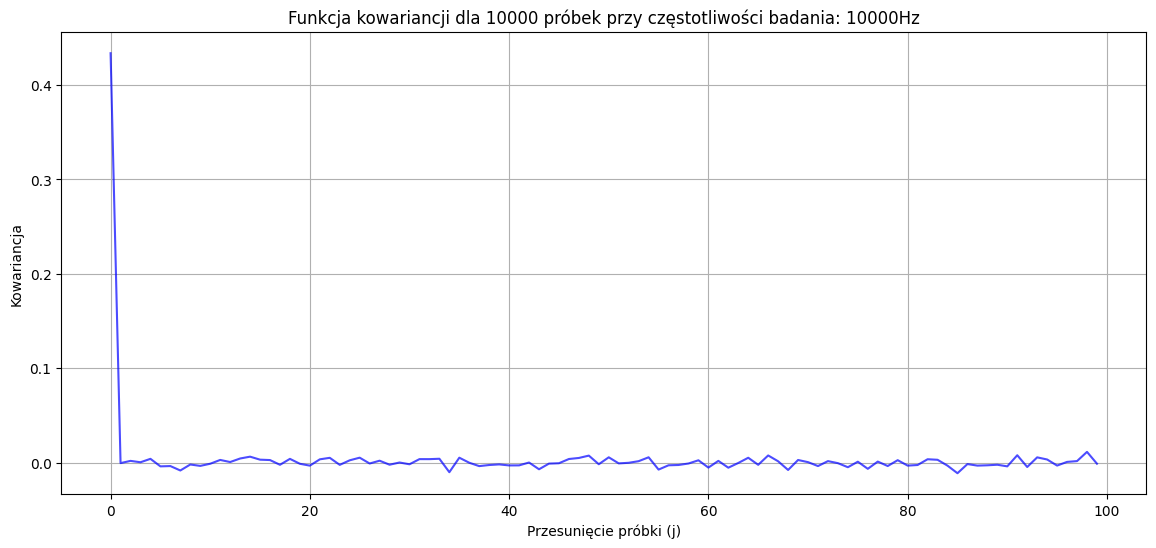

In [41]:
P_sums_table = pd.DataFrame(P_sums)
P_sums_table = P_sums_table.transpose()

for col in P_sums_table.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(P_sums_table[col], color="blue", alpha=0.7)
    plt.title(f"Funkcja kowariancji dla {sample_sizes[col]} próbek przy częstotliwości badania: {sampling_freq}Hz")
    plt.xlabel("Przesunięcie próbki (j)", )
    plt.ylabel("Kowariancja")
    plt.grid(True)
    plt.show()


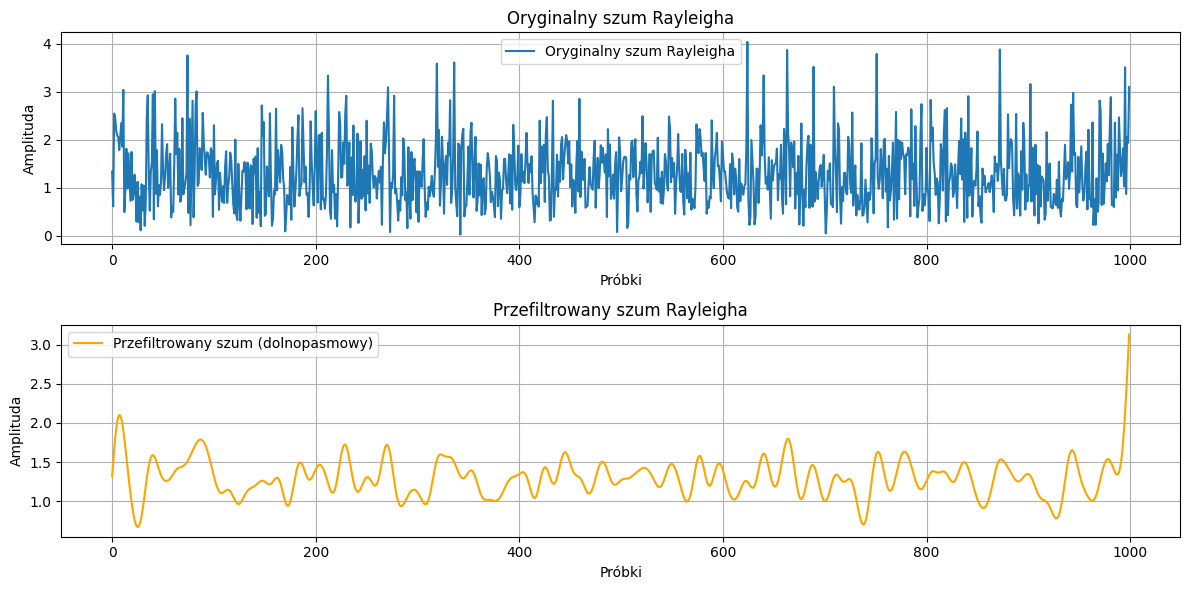

In [40]:
# Filtracja Dolna:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parametry rozkładu Rayleigha
sigma = 1.0  # parametr skali
N = 1000  # liczba próbek

# Generowanie szumu z rozkładu Rayleigha
rayleigh_noise = np.random.rayleigh(sigma, N)

# Parametry filtru dolnopasmowego
fs = 1000  # częstotliwość próbkowania [Hz]
fc = 50    # częstotliwość odcięcia [Hz]
b, a = signal.butter(4, fc / (fs / 2), btype='low')  # Filtr Butterwortha, 4 rzędu

# Filtracja dolnopasmowa
filtered_noise = signal.filtfilt(b, a, rayleigh_noise)

# Wizualizacja
plt.figure(figsize=(12, 6))

# Sygnał pierwotny
plt.subplot(2, 1, 1)
plt.plot(rayleigh_noise, label="Oryginalny szum Rayleigha")
plt.title("Oryginalny szum Rayleigha")
plt.xlabel("Próbki")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()

# Sygnał przefiltrowany
plt.subplot(2, 1, 2)
plt.plot(filtered_noise, color='orange', label="Przefiltrowany szum (dolnopasmowy)")
plt.title("Przefiltrowany szum Rayleigha")
plt.xlabel("Próbki")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()